In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

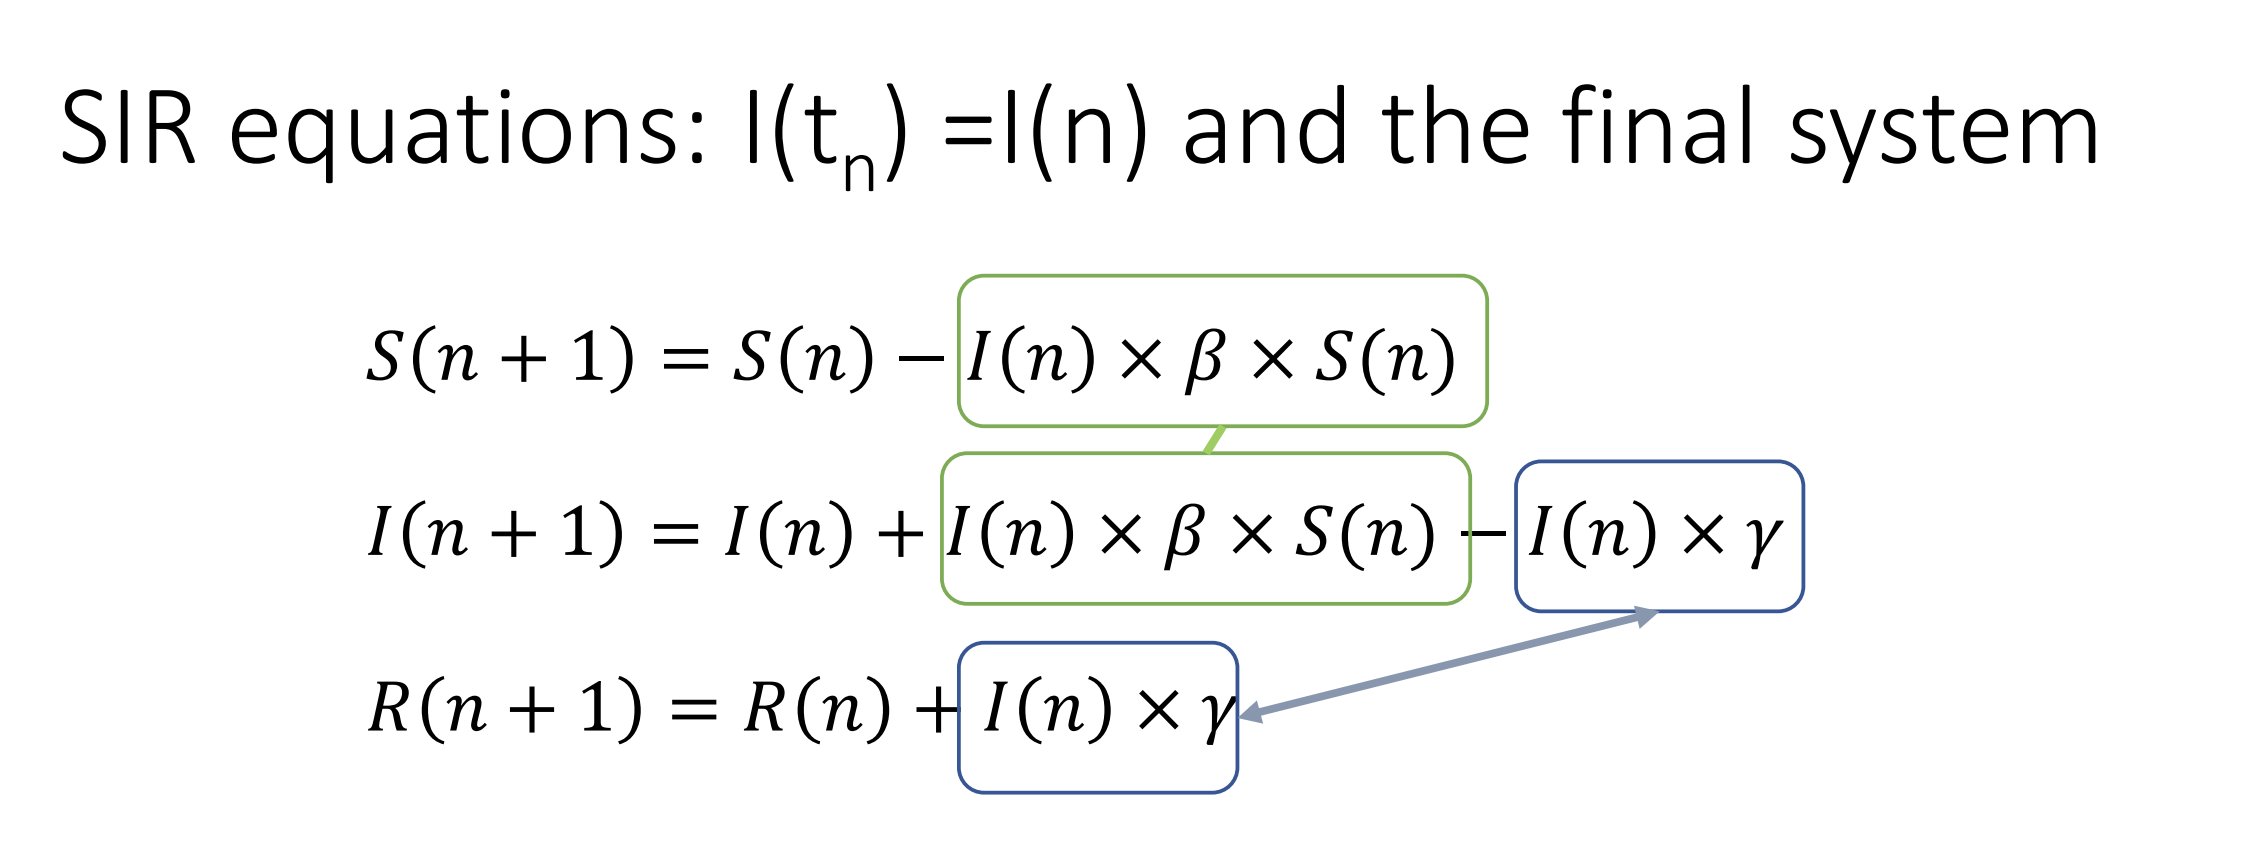

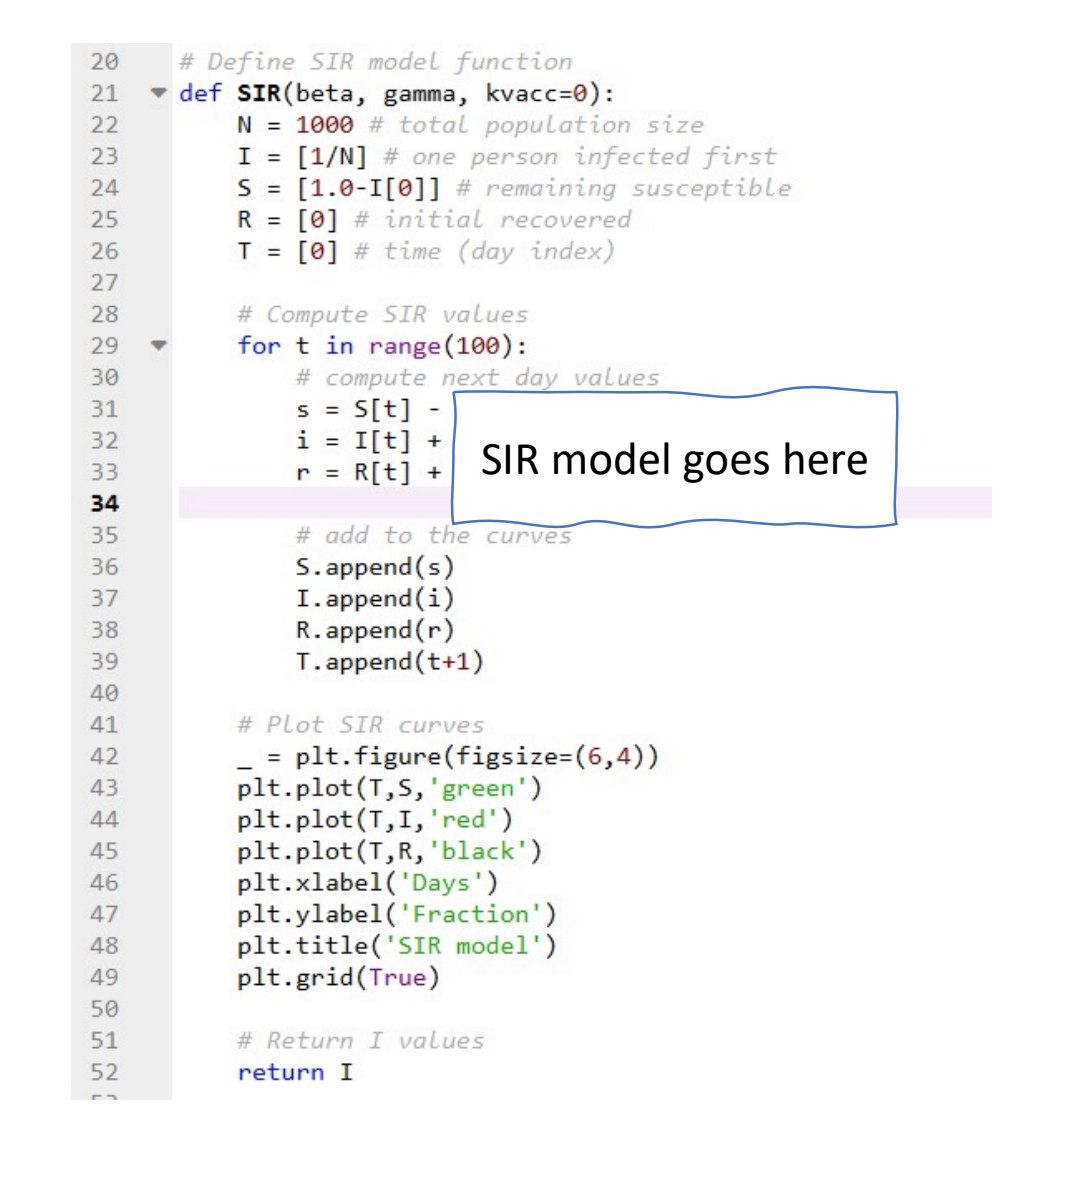

In [56]:
def SIR(beta=0.1, gamma=0.1, pop_size=1000, days=365, kvacc=0):
  kvacc = kvacc / 100
  I = [1/pop_size]
  S = [1.0 - I[0]]

  R = [kvacc * S[0]]
  S[0] -= S[0] * kvacc

  T = [0]

  for t in range(days):
    s = S[t] - I[t] * beta * S[t] - kvacc * S[t]
    i = I[t] + I[t] * beta * S[t] - I[t] * gamma
    r = R[t] + I[t] * gamma + kvacc * S[t]

    S.append(s)
    I.append(i)
    R.append(r)
    T.append(t)

  _ = plt.figure(figsize=(6,4))
  plt.plot(T,S, 'green')
  plt.plot(T,I, 'red')
  plt.plot(T,R, 'black')
  plt.xlabel('Days')
  plt.ylabel('Fraction')
  plt.title('SIR model')
  plt.grid(True)
  return I

## Model A: baseline

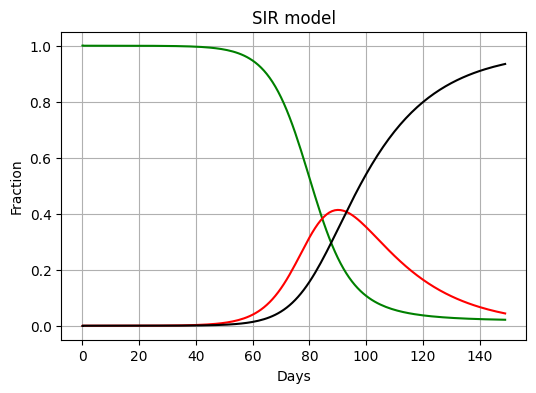

In [63]:
N = 12e4
beta = 2e-1
gamma = 1/20

I = SIR(beta, gamma, N, 150)

In [64]:
I.index(max(I))

91

## Model B: vaccine

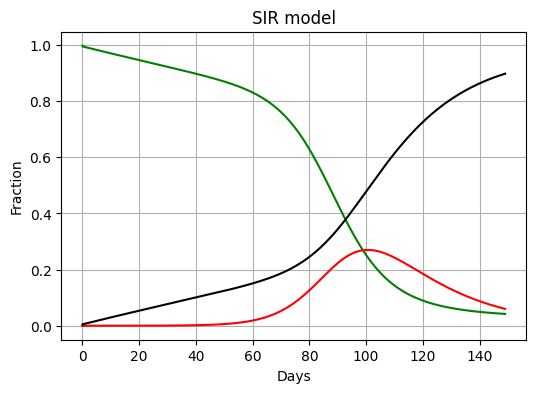

In [57]:
I_025 = SIR(beta, gamma, N, days=150, kvacc=0.25)

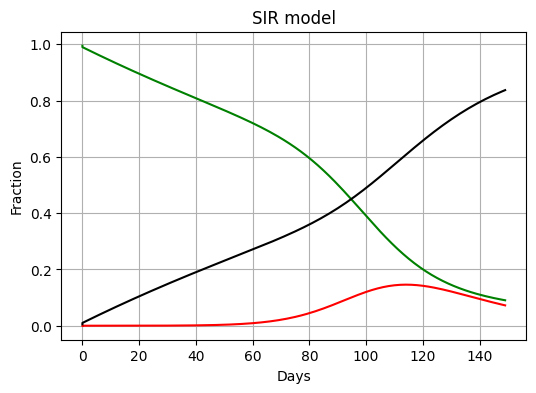

In [58]:
I_05 = SIR(beta, gamma, N, days=150, kvacc=0.5)

In [59]:
np.argmax(I_05)

115

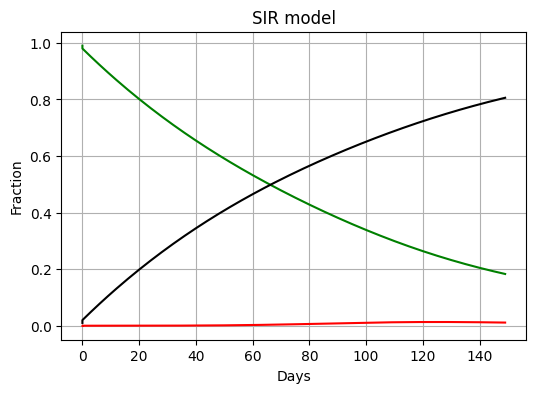

In [60]:
I_1 = SIR(beta, gamma, N, days=150, kvacc=1)

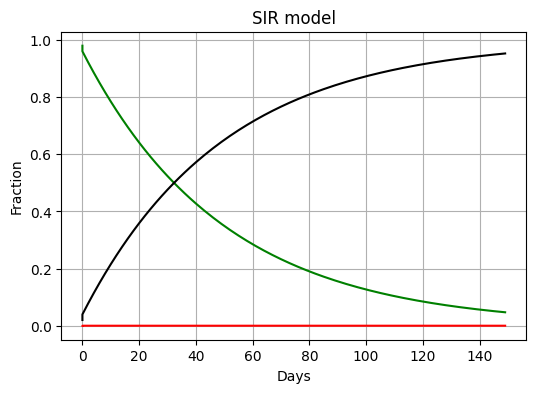

In [61]:
I_2 = SIR(beta, gamma, N, days=150, kvacc=2)

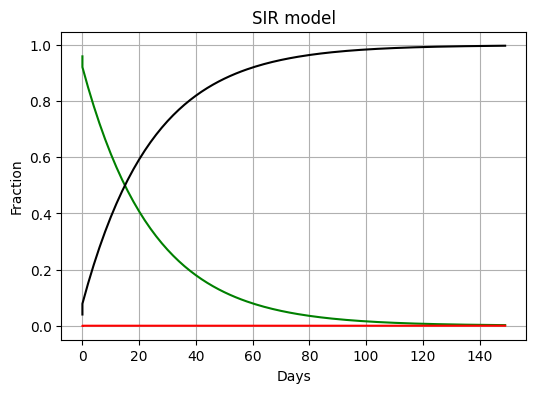

In [62]:
I_4 = SIR(beta, gamma, N, days=150, kvacc=4)

## Model C: faster recovery

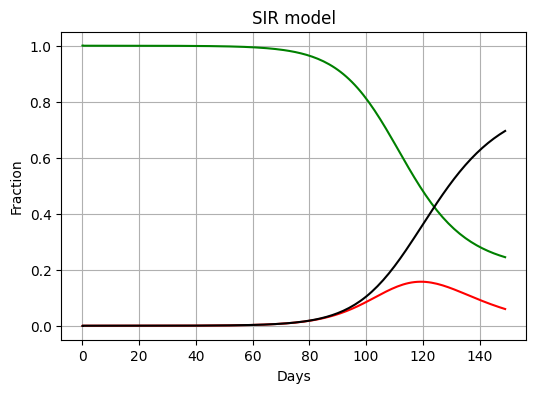

In [67]:
I = SIR(beta, gamma*2, N, 150)

In [68]:
np.argmax(I)

120

## Model D: social distancing


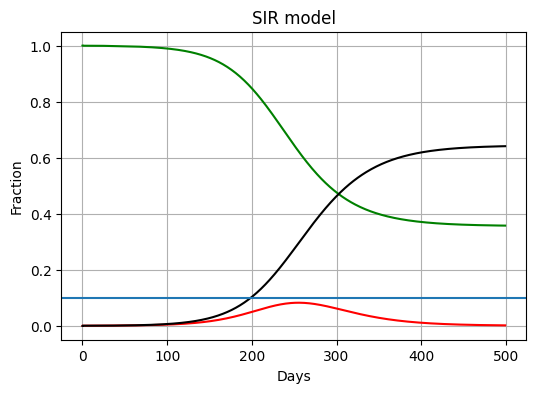

In [129]:
pop_size=12e4
days=500
beta = 2e-1
gamma = 1/20

I = [1/pop_size]
S = [1.0 - I[0]]
R = [0]
T = [0]

for t in range(days):
  if t == 29:
    #beta *= 0.406
    beta /= 2.5
  s = S[t] - I[t] * beta * S[t]
  i = I[t] + I[t] * beta * S[t] - I[t] * gamma
  r = R[t] + I[t] * gamma

  S.append(s)
  I.append(i)
  R.append(r)
  T.append(t)

_ = plt.figure(figsize=(6,4))
plt.plot(T,S, 'green')
plt.plot(T,I, 'red')
plt.plot(T,R, 'black')
plt.axhline(0.1)
plt.xlabel('Days')
plt.ylabel('Fraction')
plt.title('SIR model')
plt.grid(True)

In [130]:
np.argmax(I)

256